Fikko Muharavid Y. M.
(21051214004)

---

Kelas   : SI 2021B

---

Dataset Bakery

## **Anomaly Detection**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

In [ ]:
df = pd.read_csv('Twitter_volume_FB.csv')
df.head()

,timestamp,value
0,2015-02-26 21:42:53,53
1,2015-02-26 21:47:53,64
2,2015-02-26 21:52:53,49
3,2015-02-26 21:57:53,48
4,2015-02-26 22:02:53,22


In [ ]:
df. describe()

,value
count,152.000000
mean,23.184211
std,27.477726
min,5.000000
25%,11.000000
50%,16.000000
75%,23.250000
max,205.000000


In [ ]:
percentile_95 = np.percentile(df['value'], 95, method='median_unbiased')
percentile_5 = np.percentile(df['value'], 5, method='median_unbiased')
greater_than_95 = (df[['value']] > percentile_95)
smaller_than_5 = (df[['value']] < percentile_5)

In [ ]:
 #Membuat kolom baru dengan nama colors untuk menyimpan warna setiap kondisi diatas
df['colors'] = np.where(greater_than_95,'r',np.where(smaller_than_5,'r','b'))

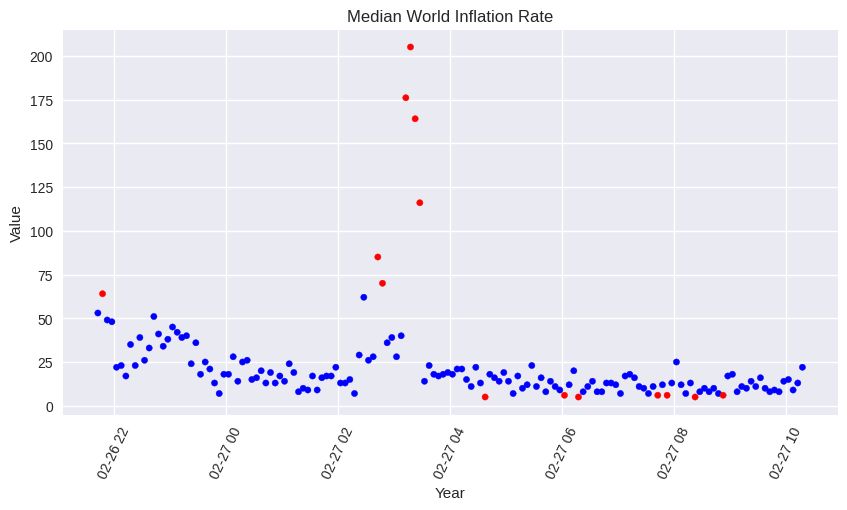

In [ ]:
df.plot.scatter(x='timestamp',y='value',c = df['colors'].apply(lambda x: dict(r='red', b='blue')[x]),
           figsize=(10, 5),title='Median World Inflation Rate',xlabel='Year',ylabel='Value')
plt.xticks(rotation=65);

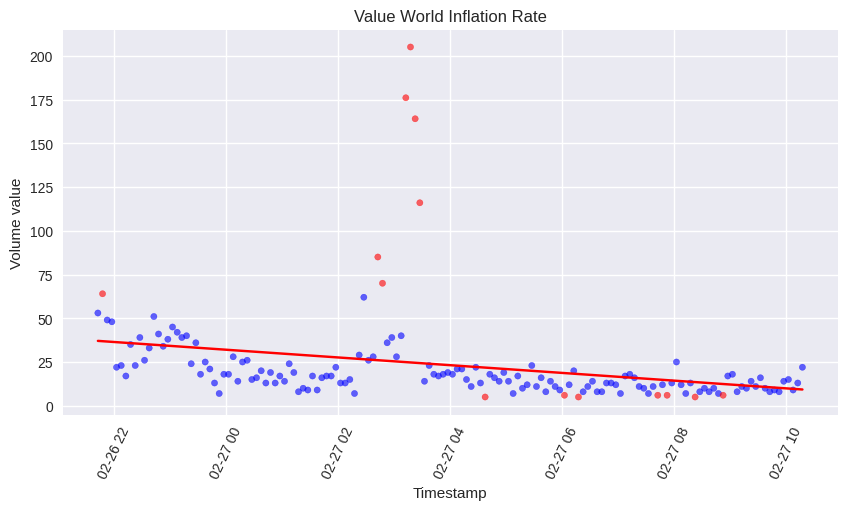

In [ ]:
# Mengonversi kolom 'timestamp' menjadi tipe data datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Mengonversi timestamp ke dalam bentuk numerik (timestamp sebagai detik sejak epoch)
df['timestamp_numeric'] = df['timestamp'].astype(int) // 10**9

# Membuat model regresi linear
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(df[['timestamp_numeric']], df[['value']])

# Plotting dengan nama kolom yang diubah pada tampilan grafik
ax = df.plot.scatter(x='timestamp', y='value',
                     c=df['colors'].apply(lambda x: dict(r='red', b='blue')[x]),
                     alpha=.6, figsize=(10, 5),
                     title='Value World Inflation Rate', xlabel='Timestamp', ylabel='Volume value')
reg_prediction = LinearRegression_model.predict(df[['timestamp_numeric']])
ax.plot(df['timestamp'], reg_prediction, c='r')
plt.xticks(rotation=65)
plt.show()

In [ ]:
#Pendekatan Unsupervised dengan Local Outlier  Factor (LOF)

In [ ]:
model_LOF = LocalOutlierFactor()
LOF_predictions = model_LOF.fit_predict(df[['timestamp_numeric']])
model_LOF_scores = model_LOF.negative_outlier_factor_
df['LOF_anomaly_scores'] = model_LOF_scores
df['LOF_anomaly'] = LOF_predictions

<ipython-input-45-378686c034b2>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


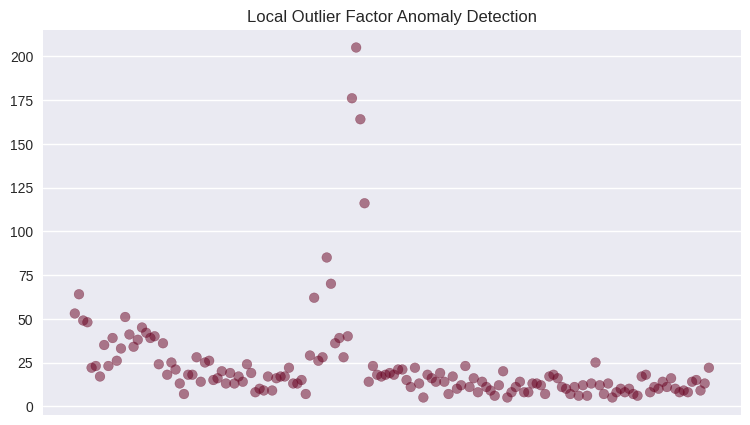

In [ ]:
plt.style.use("seaborn")
fig, ax = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)
ax.scatter(df['timestamp_numeric'], df['value'],c=df['LOF_anomaly'],cmap='RdBu',alpha=0.5 )
ax.set_title("Local Outlier Factor Anomaly Detection")

for anomaly in df[df['LOF_anomaly'] == -1]['timestamp_numeric']:
    ax.annotate(anomaly, xy=(anomaly, df[df['timestamp_numeric'] == anomaly]['value']),
                 xytext=(anomaly,df[df['timestamp_numeric'] == anomaly]['value'] + 0.2))
ax.get_xaxis().set_visible(False)

In [ ]:
model_LOF_10 = LocalOutlierFactor(n_neighbors=4)
LOF_predictions_10 = model_LOF_10.fit_predict(df[['value']])
model_LOF_scores_10= model_LOF_10.negative_outlier_factor_
df['LOF_anomaly_score_10'] = model_LOF_scores_10
df['LOF_anomaly_10'] = LOF_predictions_10

<ipython-input-47-dfe9c57a2007>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


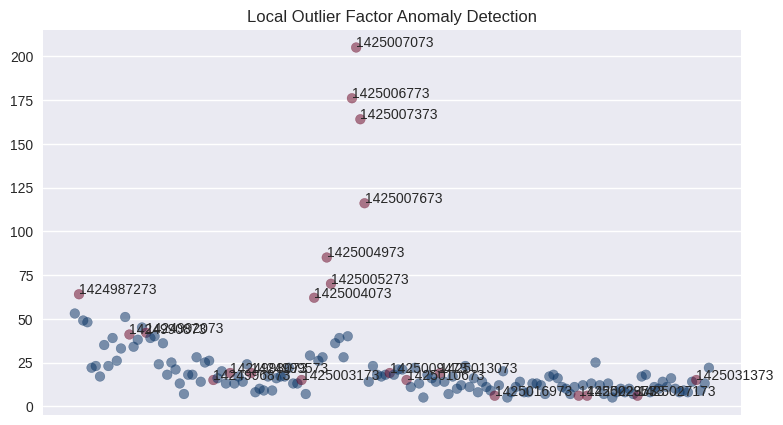

In [ ]:
plt.style.use("seaborn")
fig, ax2 = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)
ax2.scatter(df['timestamp_numeric'], df['value'],c=df['LOF_anomaly_10'],cmap='RdBu',alpha=0.5 )
ax2.set_title("Local Outlier Factor Anomaly Detection")

for anomaly in df[df['LOF_anomaly_10'] == -1]['timestamp_numeric']:
    ax2.annotate(anomaly, xy=(anomaly, df[df['timestamp_numeric'] == anomaly]['value']),
                 xytext=(anomaly,df[df['timestamp_numeric'] == anomaly]['value'] + 0.2))
ax2.get_xaxis().set_visible(False)

In [ ]:
#Pendekatan dengan algoritma ISOLATION FORREST

In [ ]:
model_IF = IsolationForest()
model_IF.fit(df[['value']])
df['IF_anomaly_scores'] = model_IF.decision_function(df[['value']])
df['IF_anomaly'] = model_IF.predict(df[['value']])

<ipython-input-50-57e169a9a314>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


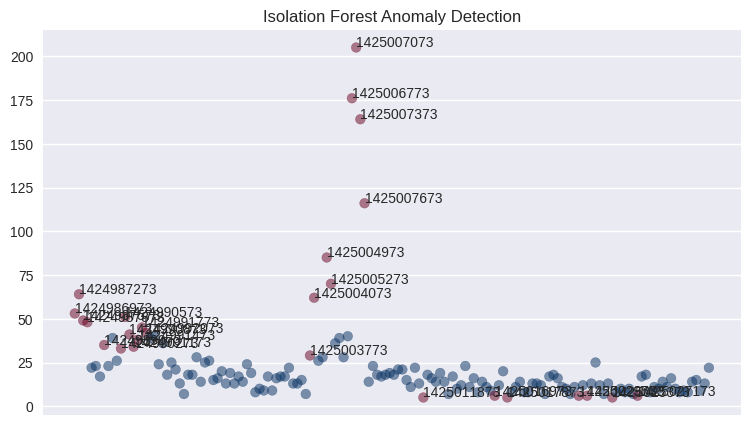

In [ ]:
plt.style.use("seaborn")
fig, ax3 = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)
ax3.scatter(df['timestamp_numeric'], df['value'],c=df['IF_anomaly'],cmap='RdBu',alpha=0.5 )
ax3.set_title("Isolation Forest Anomaly Detection")

for anomaly in df[df['IF_anomaly'] == -1]['timestamp_numeric']:
    ax3.annotate(anomaly, xy=(anomaly, df[df['timestamp_numeric'] == anomaly]['value']),
                 xytext=(anomaly,df[df['timestamp_numeric'] == anomaly]['value'] + 0.2))
ax3.get_xaxis().set_visible(False)

In [ ]:
model_IF_05 = IsolationForest(contamination=float(.03))
model_IF_05.fit(df[['value']])
df['IF_anomaly_scores_05'] = model_IF_05.decision_function(df[['value']])
df['IF_anomaly_05'] = model_IF_05.predict(df[['value']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


<ipython-input-52-b7df1e7a7b74>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


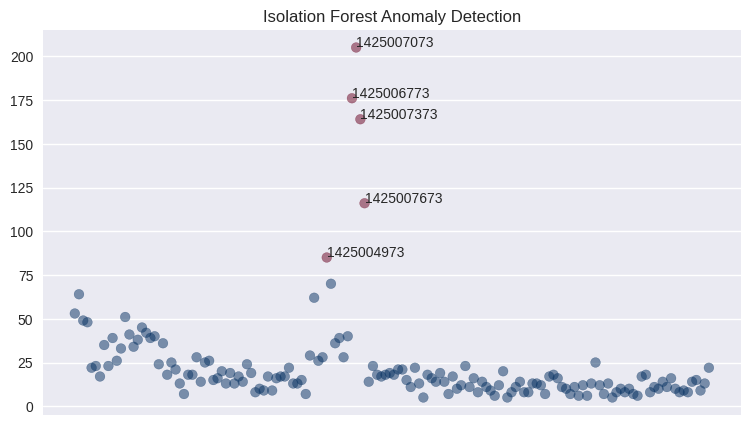

In [ ]:
plt.style.use("seaborn")
fig, ax4 = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)
ax4.scatter(df['timestamp_numeric'], df['value'],c=df['IF_anomaly_05'],cmap='RdBu',alpha=0.5 )
ax4.set_title("Isolation Forest Anomaly Detection")

for anomaly in df[df['IF_anomaly_05'] == -1]['timestamp_numeric']:
    ax4.annotate(anomaly, xy=(anomaly, df[df['timestamp_numeric'] == anomaly]['value']),
                 xytext=(anomaly,df[df['timestamp_numeric'] == anomaly]['value'] + 0.2))
ax4.get_xaxis().set_visible(False)